 # business problem

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
path=r"C:\Users\NITESH KUMAWAT\Documents\library\projets\income _pred\Salary_Data.csv"
df=pd.read_csv(path)

In [3]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


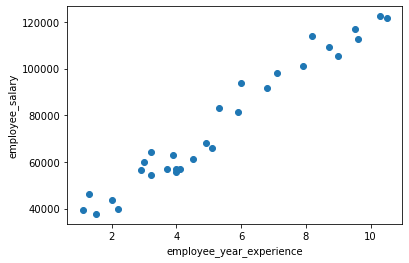

In [7]:
plt.scatter(x=df.YearsExperience,y=df.Salary)
plt.xlabel("employee_year_experience")
plt.ylabel("employee_salary")
plt.show()

# preparing data for ml algo

In [8]:
# data cleaning

In [9]:
df.isnull().sum(0)

YearsExperience    0
Salary             0
dtype: int64

In [10]:
df.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [11]:
df2=df.fillna(df.mean())

In [12]:
df2.isnull().sum(0)

YearsExperience    0
Salary             0
dtype: int64

In [13]:
# split dataset

In [14]:
X=df2.iloc[:,:-1].values
y=df2.iloc[:,-1].values

In [15]:
print("shape of X=",X.shape)
print("shape of y=",y.shape)

shape of X= (30, 1)
shape of y= (30,)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=101)

In [17]:
x_train

array([[ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [18]:
y_train

array([ 63218.,  43525.,  46205.,  93940., 101302.,  56957.,  56642.,
        61111.,  39343.,  98273.,  39891.,  64445.,  57081.,  57189.,
        67938., 121872., 113812.,  60150.,  83088.,  55794.])

In [19]:
x_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [20]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [21]:
print("shape of x train ",x_train.shape )
print("shape of x test ",x_test.shape)
print("shape of y train ",y_train.shape)
print("shape of y test ",y_test.shape)

shape of x train  (20, 1)
shape of x test  (10, 1)
shape of y train  (20,)
shape of y test  (10,)


In [22]:
# y=m*x+c

In [23]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()

In [24]:
LR.fit(x_train,y_train)

LinearRegression()

In [25]:
# m value 
LR.coef_

array([9692.26318876])

In [26]:
# value
LR.intercept_

25570.538282485482

In [27]:
LR.predict([[4]])[0].round(2)

64339.59

In [28]:
y_pred=LR.predict(x_test)

In [29]:
y_pred

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [30]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["year_experiene","salary_orignal","salary_predicted"])

,year_experiene,salary_orignal,salary_predicted
0,6.8,91738.0,91477.927966
1,8.7,109431.0,109893.228025
2,3.2,54445.0,56585.780487
3,5.9,81363.0,82754.891096
4,1.5,37731.0,40108.933066
5,9.6,112635.0,118616.264895
6,9.5,116969.0,117647.038576
7,5.1,66029.0,75001.080545
8,9.0,105582.0,112800.906981
9,10.3,122391.0,125400.849127


# fine tune our model

In [31]:
LR.score(x_test,y_test)

0.974811112371526

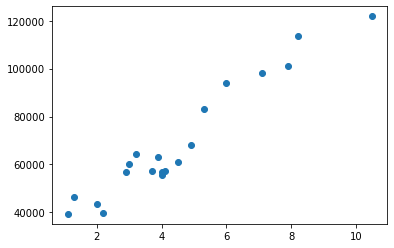

In [32]:
plt.scatter(x_train,y_train)

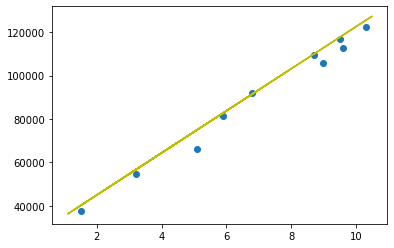

In [33]:
plt.scatter(x_test,y_test)
plt.plot(x_train,LR.predict(x_train),color="y")

# present our solution

# # save ML modal

In [34]:
import joblib
joblib.dump(LR,"empyloyee_salary_prediction_mode.pkl")

['empyloyee_salary_prediction_mode.pkl']

In [36]:
modal=joblib.load("empyloyee_salary_prediction_mode.pkl")
modal.predict([[2]])

array([44955.06466])

# metrics

In [44]:
from sklearn import metrics
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R2=metrics.r2_score(y_test,y_pred)

In [45]:
rmse

4363.043260343273

In [43]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["year_experiene","salary_orignal","salary_predicted"])

,year_experiene,salary_orignal,salary_predicted
0,6.8,91738.0,91477.927966
1,8.7,109431.0,109893.228025
2,3.2,54445.0,56585.780487
3,5.9,81363.0,82754.891096
4,1.5,37731.0,40108.933066
5,9.6,112635.0,118616.264895
6,9.5,116969.0,117647.038576
7,5.1,66029.0,75001.080545
8,9.0,105582.0,112800.906981
9,10.3,122391.0,125400.849127


In [47]:
R2   # >70 is also good 

0.974811112371526

In [52]:
R3=metrics.r2_score(y_train , LR.predict(x_train))

In [53]:
R3

0.9300257612268854